# Importing Libraries

In [4]:
!pip install better_profanity

  Using cached better_profanity-0.7.0-py3-none-any.whl (46 kB)


In [5]:
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [9]:
consumer_key = '7yTabphCVBnF91NZ4DICkYqa6'
consumer_secret = 'aTrHF1fSP5jBwGwqhQGK7UsMQkfQZ8yiPmHjwPknAy5t68p1hU'
access_token = '1261640525876047873-xblMWgFEVJZM2BKGnPuCXMeXwGmOpp'
access_token_secret = 'RYwGLyPLHaeHKu5T7ivGqrQOYGnObwPZN4fSrdany4rE2'

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [35]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# In this case, we will input the query

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, q=filtered,lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

Please enter your topic / person of interest: amitshah


In [36]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [37]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [38]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

C:\Users\LAKSHYA\AppData\Local\Temp\ipykernel_16140\3588238994.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['ye aahe power speech',
 'jay ho',
 'near 103 8 th dec',
 '',
 'why are you bend de railing vishwas jeeto scheme',
 '',
 'many online cloud company involved crypto forex etc trading indian deposit are mad',
 'please extend ssc date',
 'latest blore',
 'welcome new look local focallll',
 'true besides if you see condition govt hospitals you wouldnt want step inside one bes',
 'sir why is delhi police not able deal with land grab by samuday visesh new delhi even mcd is with',
 'with permission govt govt released these rapists jail',
 'good evening sir',
 'jay ho bjp sarkar',
 'shri amit shah union home minister received special blessings hh mahant swami maharaj peace progr',
 'jai ho bjp bjp',
 'when you will add bhojpuri 8th schedule indian constitution fulfill',
 'tharad b k',
 'pls include dr ajay alok bjp',
 'jay ho',
 'sushant justice fundamental right',
 'he is proof education barabar nahi hai every time we are cursing evm bjps victory',
 '',
 'kindly request ssc please extend gd 

In [39]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("ye aahe power speech"))

In [40]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]

[[0.0, 'ye aahe power speech'],
 [0.0, 'jay ho'],
 [0.1, 'near 103 8 th dec'],
 [0.0, ''],
 [0.0, 'why are you bend de railing vishwas jeeto scheme'],
 [0.0, ''],
 [-0.0625,
  'many online cloud company involved crypto forex etc trading indian deposit are mad'],
 [0.0, 'please extend ssc date'],
 [0.5, 'latest blore'],
 [0.31212121212121213, 'welcome new look local focallll'],
 [0.35,
  'true besides if you see condition govt hospitals you wouldnt want step inside one bes'],
 [-0.05681818181818182,
  'sir why is delhi police not able deal with land grab by samuday visesh new delhi even mcd is with'],
 [-0.1, 'with permission govt govt released these rapists jail'],
 [0.7, 'good evening sir'],
 [0.0, 'jay ho bjp sarkar'],
 [0.35714285714285715,
  'shri amit shah union home minister received special blessings hh mahant swami maharaj peace progr'],
 [0.0, 'jai ho bjp bjp'],
 [0.0, 'when you will add bhojpuri 8th schedule indian constitution fulfill'],
 [0.0, 'tharad b k'],
 [0.0, 'pls inc

In [41]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.000000
1     0.000000
2     0.100000
3     0.000000
4     0.000000
        ...   
95    0.285714
96    0.144444
97    0.250000
98    0.500000
99   -0.300000
Name: polarity, Length: 100, dtype: float64

In [42]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Negative
Neutral
Positive
Positive
Positive
Negative
Negative
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Negative
Negative
Neutral
Positive
Positive
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Positive
Positive
Neutral
Positive
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Negative
Neutral
Positive
Positive
Positive
Positive
Negative
35 9 56


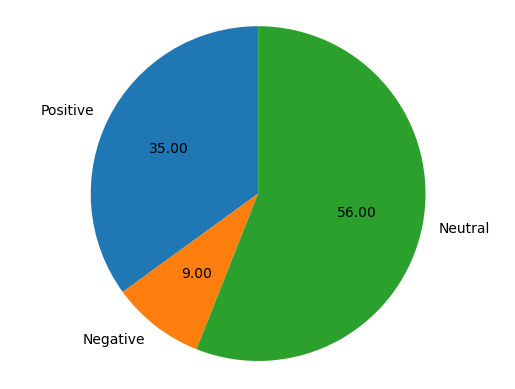

In [43]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [44]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

35.000000 percent of twitter users feel positive about amitshah
9.000000 percent of twitter users feel negative about amitshah
56.000000 percent of twitter users feel neutral about amitshah


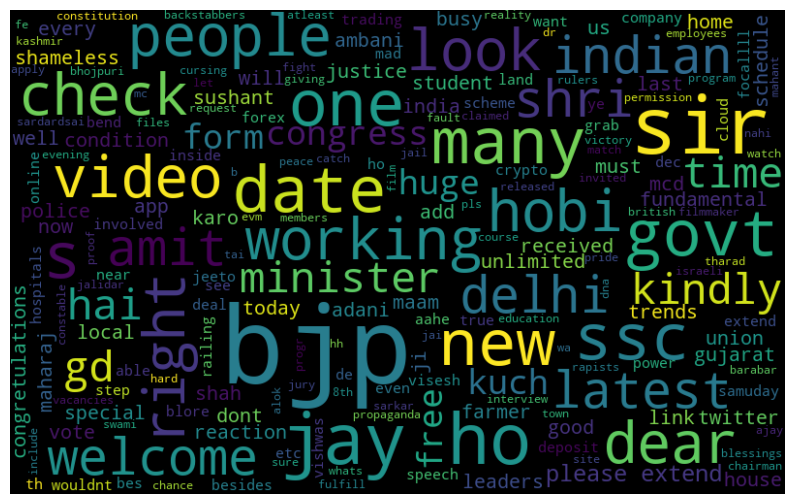

In [45]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()